<a href="https://colab.research.google.com/github/tauseeqhussain/ChurnPredictionforTelco/blob/main/Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Data**

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

In [3]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
data.shape

(7043, 21)

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#checking for  null values and zeros
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data[data=="0"].sum()
#there are no null or 0 values to be removed

customerID            0
gender                0
SeniorCitizen       0.0
Partner               0
Dependents            0
tenure              0.0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      0.0
TotalCharges          0
Churn                 0
dtype: object

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<Axes: xlabel='Churn', ylabel='tenure'>

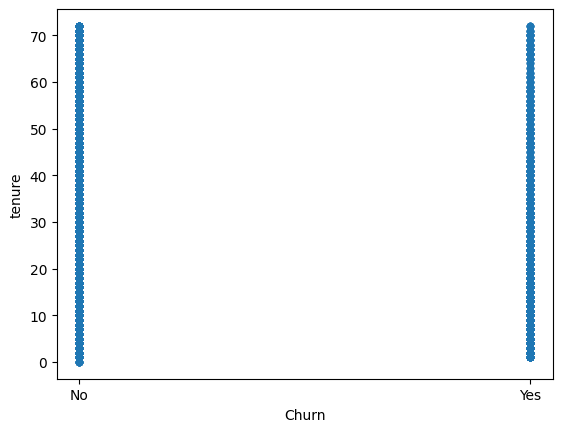

In [10]:
#scatter plot for visualizing the data
data.plot(kind="scatter",y="tenure",x="Churn")

In [11]:
#changing the categorical data into numerical data
#Random forest algorithm using scikit-learn doesnt take 0 in numeric values
#thats why we are avoiding zero in our data
numeric_dict1={"Yes":1,"No":-1,"No internet service":3}
numeric_dict2={"Yes":1,"No":-1,"No phone service":2}
numeric_dict3={"Yes":1,"No":-1}

In [12]:
data["Partner"]=data["Partner"].map(numeric_dict3)

In [13]:
data["Dependents"]=data["Dependents"].map(numeric_dict3)
data["PhoneService"]=data["PhoneService"].map(numeric_dict3)
data["PaperlessBilling"]=data["PaperlessBilling"].map(numeric_dict3)
data["Churn"]=data["Churn"].map(numeric_dict3)

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,-1,1,-1,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,-1
1,5575-GNVDE,Male,0,-1,-1,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,-1,Mailed check,56.95,1889.5,-1
2,3668-QPYBK,Male,0,-1,-1,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,-1,-1,45,-1,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,-1,Bank transfer (automatic),42.30,1840.75,-1
4,9237-HQITU,Female,0,-1,-1,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:

data['SeniorCitizen'].replace(0, -1, inplace=True)
#i am replacing the 0s in the SeniorCitizen column as -1 in order to remove 0s

In [16]:
data["MultipleLines"]=data["MultipleLines"].map(numeric_dict2)

In [17]:
data["OnlineSecurity"]=data["OnlineSecurity"].map(numeric_dict1)
data["OnlineBackup"]=data["OnlineBackup"].map(numeric_dict1)
data["DeviceProtection"]=data["DeviceProtection"].map(numeric_dict1)
data["TechSupport"]=data["TechSupport"].map(numeric_dict1)
data["StreamingTV"]=data["StreamingTV"].map(numeric_dict1)
data["StreamingMovies"]=data["StreamingMovies"].map(numeric_dict1)

In [18]:
data.head(3)
#featurewise we are interested in:
#Partner,Dependents,PhoneService,tenureSeniorCitizen,MultipleLines,OnlineSecurity
#OnlineBackup,DeviceProtection,TechSupport,StreamingTv,StreamingMovies,Paperless Billing
#MonthlyCHarges and Total Chrges
#my target variabel will be Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-1,1,-1,1,-1,2,DSL,-1,...,-1,-1,-1,-1,Month-to-month,1,Electronic check,29.85,29.85,-1
1,5575-GNVDE,Male,-1,-1,-1,34,1,-1,DSL,1,...,1,-1,-1,-1,One year,-1,Mailed check,56.95,1889.5,-1
2,3668-QPYBK,Male,-1,-1,-1,2,1,-1,DSL,1,...,-1,-1,-1,-1,Month-to-month,1,Mailed check,53.85,108.15,1


In [19]:
#if we do onehot encoding then we will have an issue.It will create three columns for this and that
#will interfere with other columns as there are other columns too with the yes and not too
#we have scaled our data from -1 to +3

In [20]:
def norm(x):
  X_scaled = (x-np.min(data["MonthlyCharges"])) * ((3 - (-1)) / (np.max(data["MonthlyCharges"]) - np.min(data["MonthlyCharges"]))) -1
  return X_scaled



In [21]:
data["MonthlyCharges"]=data["MonthlyCharges"].apply(norm)

In [22]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-1,1,-1,1,-1,2,DSL,-1,...,-1,-1,-1,-1,Month-to-month,1,Electronic check,-0.538308,29.85,-1
1,5575-GNVDE,Male,-1,-1,-1,34,1,-1,DSL,1,...,1,-1,-1,-1,One year,-1,Mailed check,0.540299,1889.5,-1


In [23]:
def cap(x):
  X_scaled2 = (x-np.min(data["tenure"])) * ((3 - (-1)) / (np.max(data["tenure"]) - np.min(data["tenure"]))) -1
  return X_scaled2

data["tenure"]=data["tenure"].apply(cap)

In [24]:
# Convert the column to numeric, errors="coerce" will handle non-numeric values by converting them to NaN
numeric_column = pd.to_numeric(data["TotalCharges"], errors="coerce")

# Check if all values in the column are numeric (no NaNs)
isnumeric = numeric_column.notnull().all()

print(isnumeric)
#false means there are values in this columns that are not numeric and we need to
#do something about it

False


In [25]:
num_str = data["TotalCharges"].apply(lambda x: isinstance(x, str)).sum()

print(f"The number of strings in column: {num_str}")
#it shows that the column has all the strings but apparenty there are only
#numeric which means there is an issue with data formating

The number of strings in column: 7043


In [26]:
#changing the data from string to numeric(dataformatting)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
num_strings = data["TotalCharges"].apply(lambda x: isinstance(x, str)).sum()
print(num_strings)

0


In [27]:
def lap(x):
  X_scaled3 = (x-np.min(data["TotalCharges"])) * ((3 - (-1)) / (np.max(data["TotalCharges"]) - np.min(data["TotalCharges"]))) -1
  return X_scaled3

data["TotalCharges"]=data["TotalCharges"].apply(lap)

In [28]:
print(data.head((3)))
print(data["TotalCharges"].max())

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG  Female             -1        1          -1 -0.944444   
1  5575-GNVDE    Male             -1       -1          -1  0.888889   
2  3668-QPYBK    Male             -1       -1          -1 -0.888889   

   PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0            -1              2             DSL              -1  ...   
1             1             -1             DSL               1  ...   
2             1             -1             DSL               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                -1           -1           -1               -1   
1                 1           -1           -1               -1   
2                -1           -1           -1               -1   

         Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
0  Month-to-month                1  Electronic check      -0.538308   
1        One year      

<Axes: ylabel='Frequency'>

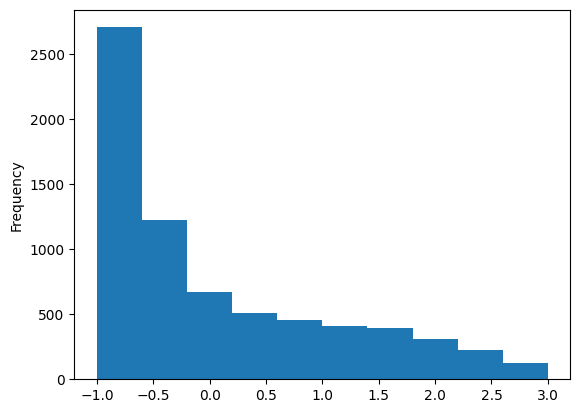

In [29]:
#checking for data distribution
#if its not concentrated to one extreme or the other,it should be somewhat equally distributed
data["TotalCharges"].plot(kind="hist")
#this data is extremely skewed to the left which can bring some changes


<Axes: ylabel='Frequency'>

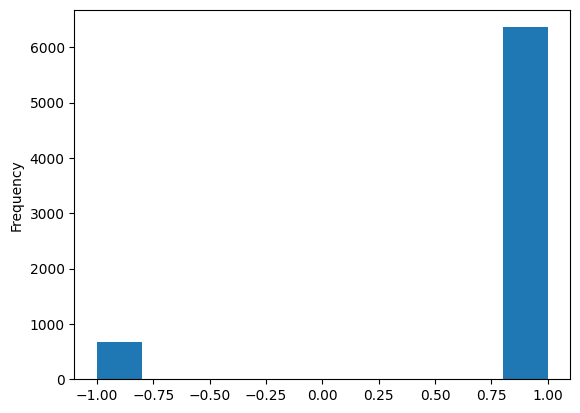

In [30]:
data["PhoneService"].plot(kind="hist")


In [31]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-1,1,-1,-0.944444,-1,2,DSL,-1,...,-1,-1,-1,-1,Month-to-month,1,Electronic check,-0.538308,-0.994900,-1
1,5575-GNVDE,Male,-1,-1,-1,0.888889,1,-1,DSL,1,...,1,-1,-1,-1,One year,-1,Mailed check,0.540299,-0.136534,-1
2,3668-QPYBK,Male,-1,-1,-1,-0.888889,1,-1,DSL,1,...,-1,-1,-1,-1,Month-to-month,1,Mailed check,0.416915,-0.958758,1
3,7795-CFOCW,Male,-1,-1,-1,1.500000,-1,2,DSL,1,...,1,1,-1,-1,One year,-1,Bank transfer (automatic),-0.042786,-0.159035,-1
4,9237-HQITU,Female,-1,-1,-1,-0.888889,1,-1,Fiber optic,-1,...,-1,-1,-1,-1,Month-to-month,1,Electronic check,1.087562,-0.938680,1


In [32]:
#removing the unwanted columns that we dont need
#removing "gender","Internet Service","Contract","Pyment Mehtod"
drop_col=["gender","InternetService","PaymentMethod","Contract"]
data=data.drop(columns=drop_col)

In [33]:
data=data.drop(columns=["customerID"])

In [34]:
data.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,-1,1,-1,-0.944444,-1,2,-1,1,-1,-1,-1,-1,1,-0.538308,-0.994900,-1
1,-1,-1,-1,0.888889,1,-1,1,-1,1,-1,-1,-1,-1,0.540299,-0.136534,-1


In [35]:
#removing all the null containing rows
data.isnull().value_counts()
data.dropna(inplace=True)

In [36]:
print(data)

      SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0                -1        1          -1 -0.944444            -1   
1                -1       -1          -1  0.888889             1   
2                -1       -1          -1 -0.888889             1   
3                -1       -1          -1  1.500000            -1   
4                -1       -1          -1 -0.888889             1   
...             ...      ...         ...       ...           ...   
7038             -1        1           1  0.333333             1   
7039             -1        1           1  3.000000             1   
7040             -1        1           1 -0.388889            -1   
7041              1        1          -1 -0.777778             1   
7042             -1       -1          -1  2.666667             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                 2              -1             1                -1   
1                -1               1      

In [37]:
data.isnull().value_counts()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn
False          False    False       False   False         False          False           False         False             False        False        False            False             False           False         False    7032
dtype: int64

#**Applying Machine Learning Model :Random Forest**
# **Without dimension reductionality**

At First I would apply no dimensional reductionality

In [38]:
#seperating data into features and target values :X and Y respectively
Y=data.Churn
print(Y)
#its the target  data

0      -1
1      -1
2       1
3      -1
4       1
       ..
7038   -1
7039   -1
7040   -1
7041    1
7042   -1
Name: Churn, Length: 7032, dtype: int64


In [39]:
Y.shape

(7032,)

In [40]:
#droping the churn column from the original data
X=data.drop("Churn",inplace=True,axis=1)


In [41]:
X=data
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,-1,1,-1,-0.944444,-1,2,-1,1,-1,-1,-1,-1,1,-0.538308,-0.994900
1,-1,-1,-1,0.888889,1,-1,1,-1,1,-1,-1,-1,-1,0.540299,-0.136534
2,-1,-1,-1,-0.888889,1,-1,1,1,-1,-1,-1,-1,1,0.416915,-0.958758
3,-1,-1,-1,1.500000,-1,2,1,-1,1,1,-1,-1,-1,-0.042786,-0.159035
4,-1,-1,-1,-0.888889,1,-1,-1,-1,-1,-1,-1,-1,1,1.087562,-0.938680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-1,1,1,0.333333,1,1,1,-1,1,1,1,1,1,1.648756,-0.089915
7039,-1,1,1,3.000000,1,1,-1,1,1,-1,1,1,1,2.381095,2.389845
7040,-1,1,1,-0.388889,-1,2,1,-1,-1,-1,-1,-1,1,-0.548259,-0.848765
7041,1,1,-1,-0.777778,1,1,-1,-1,-1,-1,-1,-1,1,1.234826,-0.867159


In [42]:
#X is features
#Y is the target

In [43]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [44]:
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (5625, 15)
X_test (1407, 15)
y_train (5625,)
y_test (1407,)


In [45]:
#training
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=30)
#n_estimators means number of number of decision trees
#we are using entropy as criteria
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=30)

Predictions

In [46]:
predic=classifier.predict(X_test) #testing on the testing dataset
print(predic)

[ 1 -1 -1 ... -1  1 -1]


In [47]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score


In [48]:
conf_matrix=confusion_matrix(y_test,predic)
print(conf_matrix)

[[927 104]
 [214 162]]


In [49]:
accuracy_score(y_test,predic)

0.7739872068230277

In [50]:
res=classification_report(y_test,predic)
print(res)

              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1031
           1       0.61      0.43      0.50       376

    accuracy                           0.77      1407
   macro avg       0.71      0.66      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [51]:
#so apparently changing n_estimators doesnt really made a difference
#i tried it from 10 to 500
#also i tried gini for criteria and it did not made difference

# **Trying Principle component Analysis**

In [ ]:
#applying principle component anlysis and then using the model to check
#if we can improve the accuracy

In [ ]:
from sklearn.decomposition import PCA
pca_val=PCA(0.95)#retains the 90% of the usefull features
#we can also take the important n features by doing n_features=4 etc
new_feat=pca_val.fit_transform(X)

In [ ]:
new_feat.shape
print((new_feat))

[[-2.87471678 -1.67649694  2.02413862 ... -0.25030175 -0.37310117
  -0.05833712]
 [-1.77033209 -1.09030239  0.73039591 ... -0.20098542  1.31771743
   0.15407343]
 [-2.01500066 -2.63225218  0.14701954 ...  0.54429063  1.06874152
  -0.0580969 ]
 ...
 [-2.70968566 -1.16506519  3.23499167 ...  0.90776067  0.96190745
   0.01624231]
 [-3.98686293 -1.16565007  0.20146147 ...  0.90720152 -0.9154617
   0.13765136]
 [-0.05952086  2.31269289 -1.90259829 ...  0.13227562  0.30465489
   0.06016773]]


In [ ]:
X2=new_feat


In [ ]:
print(pca_val.explained_variance_ratio_)
#this means that 0.51 means 51% data from the first column was picked


[0.51670788 0.14556817 0.05806636 0.05099628 0.04166664 0.03178985
 0.02656796 0.02393516 0.02272125 0.0211663  0.01841826]


In [ ]:
#X2 is the X and Y is the target variable now after PCA

# **Implementing Random Forest after PCA**
# **X2 is the features now**
#**Y are the target variable bold text**



In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,Y,test_size=0.3,random_state=30)

In [ ]:
#training
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=30)
#n_estimators means number of number of decision trees
#we are using entropy as criteria
classifier2.fit(X_train2,y_train2)

RandomForestClassifier(criterion='entropy', random_state=30)

In [ ]:
predic2=classifier2.predict(X_test2) #testing on the testing dataset
print(predic2)

[ 1 -1 -1 ...  1 -1 -1]


In [ ]:
conf_matrix2=confusion_matrix(y_test2,predic2)
print(conf_matrix2)

[[1366  184]
 [ 323  237]]


In [ ]:
accuracy_score(y_test2,predic2)
#with the principle component analysis the accuracy is even lower

0.7597156398104266

In [ ]:
res2=classification_report(y_test2,predic2)
print(res2)

              precision    recall  f1-score   support

          -1       0.81      0.88      0.84      1550
           1       0.56      0.42      0.48       560

    accuracy                           0.76      2110
   macro avg       0.69      0.65      0.66      2110
weighted avg       0.74      0.76      0.75      2110



#**Applying Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#training
X_train3,X_test3,y_train3,y_test3=train_test_split(X, Y, test_size=0.2, random_state=30)
#Linear Regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred_LR = model.predict(X_test3)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test3, y_pred_LR)
r2 = r2_score(y_test3, y_pred_LR)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
#since the R sqaure is a very low number: 0.24
#this means that the model is  not doing as compared to the average
#it doesnt fit well

Mean Squared Error: 0.5939941976255546
R-squared: 0.24166011919380093


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#splitting data
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=0.2, random_state=30)

# Creating a Logistic Regression model
model4 = LogisticRegression()

# Fit the model on the training data
model4.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred4 = model.predict(X_test4)



In [ ]:
# Calculate the accuracy of the model
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy4)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test4, y_pred4))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test4, y_pred4))

ValueError: ignored

#**Support Vector Machine**

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
#training
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,Y, test_size=0.2, random_state=42)

#creating SVM model
model5 = SVC(kernel='rbf', C=1.0)

# Fit the model on the training data
model5.fit(X_train5, y_train5)

# Make predictions on the test set
y_pred5 = model5.predict(X_test5)

In [54]:
# accuracy
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy5)

#classification report
print("Classification Report:")
print(classification_report(y_test5, y_pred5))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test5, y_pred5))

Accuracy: 0.7931769722814499
Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.92      0.87      1033
           1       0.67      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[951  82]
 [209 165]]


#**Feature Analysis**

In [55]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=cd489fce5d71a73ad4356976c520d954401344992bc6b0488b1eb33bc5afd7ba
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [56]:
perm_importance = PermutationImportance(model5, random_state=42).fit(X_test5, y_test5)

# Show feature importances
feature_importances_df = eli5.show_weights(perm_importance, feature_names=data.columns.to_list())
display(feature_importances_df)


Weight,Feature
0.0543 ± 0.0053,tenure
0.0451 ± 0.0118,MonthlyCharges
0.0227 ± 0.0135,OnlineSecurity
0.0138 ± 0.0114,TechSupport
0.0138 ± 0.0088,TotalCharges
0.0065 ± 0.0076,PaperlessBilling
0.0041 ± 0.0024,Dependents
0.0037 ± 0.0087,OnlineBackup
0.0036 ± 0.0048,StreamingMovies
0.0031 ± 0.0019,StreamingTV
